In [1]:
import matplotlib.pyplot as plt

#                           TUTORIAL 1 : Lagrange and Hermite interpolation

---------------------------------------------------------------------------------------------------------------------




# PART 1: Lagrange  interpolation and Runge phenomenon

1.0, 1The aim here is to show Runge's phenomenon for the polynomial interpolation. We are going to implement an algorithm that is linear in the number of nodes. 

Let $f: [a,b] \to \mathbb{R}$ a function and $x_0,\cdots,x_n$ in $[a,b]$. We recall that the Lagrange polynomial $P_n$ is given by the following formula
$$ P_n(x)  = f(x_0) + \sum_{k=1}^n f[x_0,\cdots,x_k] (x-x_0)\cdots(x-x_{k-1}),$$
where
$$
 f[x_j,x_{j+1},\cdots,x_k] = \frac{f[x_{j+1},\cdots,x_{k}] - f[x_j,\cdots,
      x_{k-1}]}{x_k - x_j}
      \quad \mbox{and}\quad f[x_j]=f(x_j).
$$
The goal is to implement the evaluation of $P_n$ using this formula in $O(n)$ operations. 


## 1) Evaluation of a polynomial in the Newton basis
Given a family of real numbers $x_0 <x_1\cdots < x_{n-1}$, one consider the polynomial $P$ over the form
 $$P(x) = a_0 + a_1 (x - x_0) + a_2 (x - x_0) (x - x_1) + \cdots + a_n (x - x_0) \cdots
  (x - x_{n-1}).$$ 
  Write a function $\textit{lagrange_newton}$ that associates to two lists of real numbers $(x_i)$, $(a_i)$ and a real  $x$ the value $P(x)$ (and such that the number of operations is in  $\mathrm{O}(n)$).


In [2]:
import numpy as np

# Attention size(A) = size(X) (but we don't use le last element of X : X(n-1))
def lagrange_newton(A,X,x):
    # return np.sum([A[i]*np.prod([x-X[j] for j in range(i)]) for i in range(len(A))])
    # TO BE DONE
    c = 1
    total = A[0]
    for i in range(1,len(A)):
        c *= x-X[i-1]
        total += A[i]*c
    return total

In [3]:
A = [1, 0, 1]
X = [0, 0]

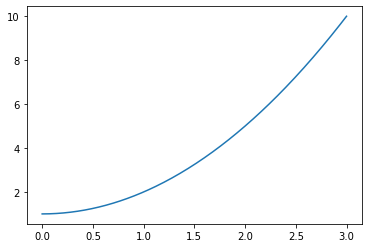

In [4]:
x = np.arange(0,3+1e-2,1e-2)
y = [lagrange_newton(A, X, z) for z in x]
plt.plot(x, y)

In [5]:
y[0], y[-1]

(1.0, 10.0)

## 2) Evaluation of the Newton coefficients

Write a function $\textit{coef_newton}$ that associates to $X=(x_0,\cdots,x_n)$ and $F=(f(x_0),\cdots,f(x_n))$ the coefficients of the Lagrange polynomial in the basis 
$$\Big( (x-x_0)\cdots (x-x_{k}) \Big)_{0\leq k \leq n-1}.$$

In [6]:
# It returns size(Coef) = size(X)
def coef_newton(X,F):
    # TO BE DONE
    Coef = []
    f = [[z for z in F]]
    for i in range(len(F)-1):
        # take the last row (f[-1]) and difference the 2 adjacent j+1 and j
        # take the last x and first x from the last row's representation j+i+1 and j
        f.append([ (f[-1][j+1] - f[-1][j]) / (X[j+i+1]-X[j]) for j in range(len(f[-1])-1)])
    Coef = [f[i][0] for i in range(len(f))]
    return Coef

1 + x + x^2

In [7]:
coef_newton([0, 1, 2], [1, 3, 7])

[1, 2.0, 1.0]

## 3) Lagrange polynomial evaluation

Write a function $\textit{lagrange_polynomial}$ that calculates the Lagrange polynomial on $X,F$.

In [8]:
def lagrange_polynomial(X,F,x):
    # TO BE DONE
    coef = coef_newton(X,F)
    return [lagrange_newton(coef, X, z) for z in x]
    return Lagx

In [9]:
x = np.arange(3)
y = x**2

In [10]:
coef = coef_newton(x, y)

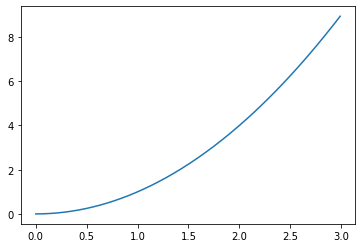

In [11]:
plt.plot(np.arange(0,3,1e-2), lagrange_polynomial([0, 1, 3], [0, 1, 9], np.arange(0,3,1e-2)))

## 4) Exemple 1 : sinus

Plot the Lagrange polynomial for the function $\sin$ for $n=3,5,10$. What do you observe ?

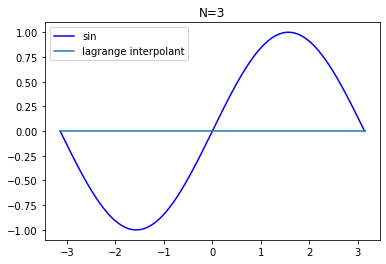

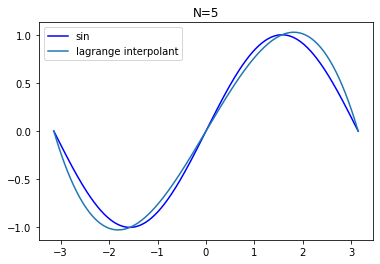

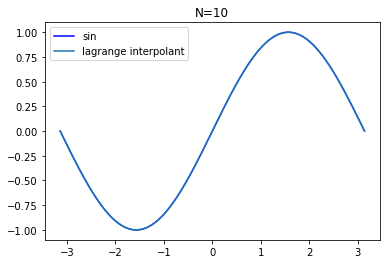

In [12]:
for N in [3, 5, 10]:
    #  plot of sinus curve
    x = np.linspace(-np.pi,np.pi,500)
    f = np.sin(x)
    plt.plot(x,f,'b',label = "sin")

    train_x = np.linspace(-np.pi, np.pi, N)
    train_y = np.sin(train_x)
    plt.plot(x, lagrange_polynomial(train_x, train_y, x), label='lagrange interpolant')
    plt.legend()
    plt.title('N='+str(N))
    # TO BE DONE
    plt.show()



## 5) Exemple 2 : the square function

Plot the Lagrange polynomial and and the square function for $n=2,3,5$. What do you observe ?

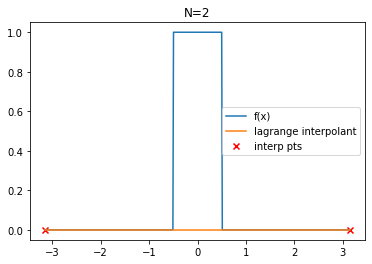

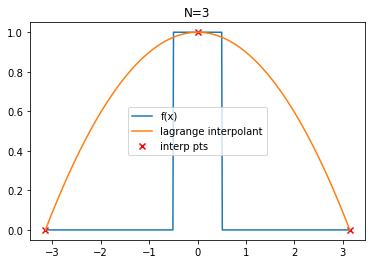

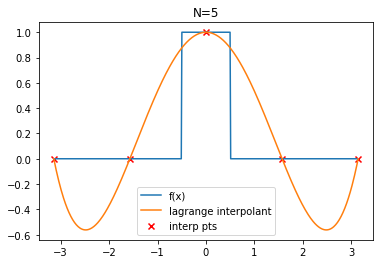

In [13]:
def func(x):
    y = np.empty_like(x)
    mask = np.logical_and(x<0.5, x>-0.5)
    y[mask] = 1
    y[~mask] = 0
    return y

for N in [2, 3, 5]:
    #  plot of sinus curve
    x = np.linspace(-np.pi,np.pi,500)
    f = func(x)
    plt.plot(x,f,label = "f(x)")
    train_x = np.linspace(-np.pi, np.pi, N)
    train_y = func(train_x)
    plt.scatter(train_x, train_y,color='red', marker='x', label='interp pts')
    plt.plot(x, lagrange_polynomial(train_x, train_y, x), label='lagrange interpolant')
    plt.legend()
    plt.title('N='+str(N))
    # TO BE DONE
    plt.show()

## 6) Example 3. Runge phenomenon

Plot the Lagrange polynomial the function $f(x)=1/(1+25x^2)$ for $n=5,10,13$. What do you observe ?


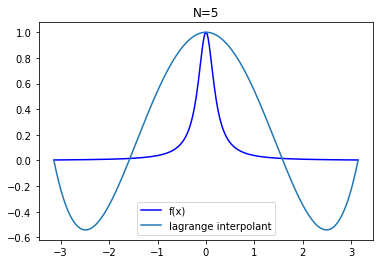

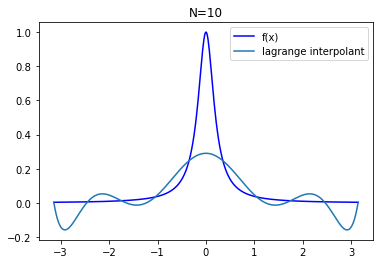

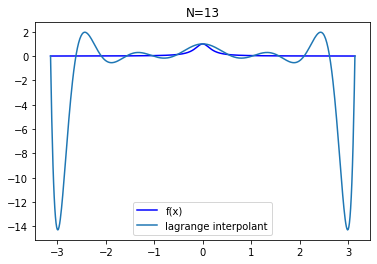

In [14]:
def func(x):
    return 1./ (1 + 25 * x**2)

for N in [5, 10, 13]:
    #  plot of sinus curve
    x = np.linspace(-np.pi,np.pi,500)
    f = func(x)
    plt.plot(x,f,'b',label = "f(x)")

    train_x = np.linspace(-np.pi, np.pi, N)
    train_y = func(train_x)
    plt.plot(x, lagrange_polynomial(train_x, train_y, x), label='lagrange interpolant')
    plt.legend()
    plt.title('N='+str(N))
    # TO BE DONE
    plt.show()



# PART 2: Hermite Interpolation
The goal of this part is to provide a function $\textit{hermite}$ that interpolates both points and tangents. 
### 1) First define the functions $h_0$, $h_1$, $h_2$ and $h_3$ from $[0,1]$ to $\mathbb{R}$

## I didn't write down the formulas for h_i so I got them from here: https://www.sciencedirect.com/science/article/pii/0377042794000263

In [15]:
def h0(x): return (1-x)**2 * (1+x*2)
def h1(x): return 1 - h0(x)
def h2(x): return (1-x)**2 * x
def h3(x): return -1*(1-x)*x**2

In [16]:
def hermite(x, y, y_prime, t):
    closest_index = next(i for i in range(len(x)) if x[i+1]>t)
    t_prime = (t-x[closest_index]) / (x[closest_index+1] - x[closest_index])
    poly = y[closest_index]*h0(t_prime)
    poly += y[closest_index+1]*h1(t_prime)
    poly += (x[closest_index+1]-x[closest_index]) * y_prime[closest_index] * h2(t_prime)
    poly += (x[closest_index+1]-x[closest_index]) * y_prime[closest_index+1] * h3(t_prime)
    return poly

In [17]:
N = 8
x = np.linspace(-1,1,N)
y = 1./(1+25*x**2)
y_prime = -50*x/((1+25*x**2)**2)

In [18]:
x_test = np.linspace(-0.99,0.99,500)
y_test = 1./(1+25*x_test**2)

In [19]:
y_interp = [hermite(x, y, y_prime, z) for z in x_test]

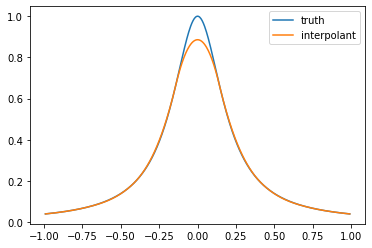

In [20]:
plt.plot(x_test, y_test, label='truth')
plt.plot(x_test, y_interp, label='interpolant')
plt.legend()
plt.legend();